<a href="https://colab.research.google.com/github/luizfernandodag/DataScience/blob/master/Projeto_Kmeans_elbow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means
* 1 - Escolhe K pontos aleatórios como centros de cluster chamados centróides.
* 2 - Atribui cada ponto ao cluster mais próximo calculando sua distância para cada centróide.
* 3 - Encontra o novo centro de cluster, medindo a média dos pontos atribuídos.
* 4 - Repete as etapas 2 e 3 até que nenhuma das atribuições de cluster seja alterada.<br><br>

![alt text](https://i.imgur.com/k4XcapI.gif)
---

* Segmentação de Imagem
* Segmentação de Clientes
* Clustering de Genes
* Cluster de notícias(por assunto)
* Idiomas de cluster
* Agrupamento de espécies
* Detecção de outliers

In [ ]:
# CARREGAR LIBS
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers

In [ ]:
# X e Y com 200 amostras
features, clusters = make_blobs(n_samples = 2000, n_features = 10, centers = 5, cluster_std = 0.4, shuffle = True)

In [ ]:
# Primeiras 5 amostras e 10 features
print("Feature Matrix: ");
print(pd.DataFrame(features, columns=['Feature 1', 'Feature 2', 'Feature 3',
      'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8',
      'Feature 9', 'Feature 10']).head())



Feature Matrix: 
   Feature 1  Feature 2  Feature 3  ...  Feature 8  Feature 9  Feature 10
0   9.613818   2.975250   5.868485  ...  -7.941067   3.779911   -4.582295
1   9.183741   3.683245   6.008868  ...  -6.450553   3.881173   -3.517211
2   3.517817   9.387933   3.364409  ...  -9.909415   7.764099   -6.448756
3   2.621345  -6.828623  -9.046782  ...  -2.149038   9.295352   -1.309997
4  -3.521431   5.490443  -6.988612  ...   6.011159  -6.168905   -1.363479

[5 rows x 10 columns]


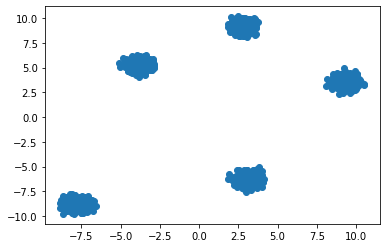

In [ ]:
# Create a scatterplot of the first and second features
plt.scatter(features[:,0], features[:,1])

## K-means com scikitlearn

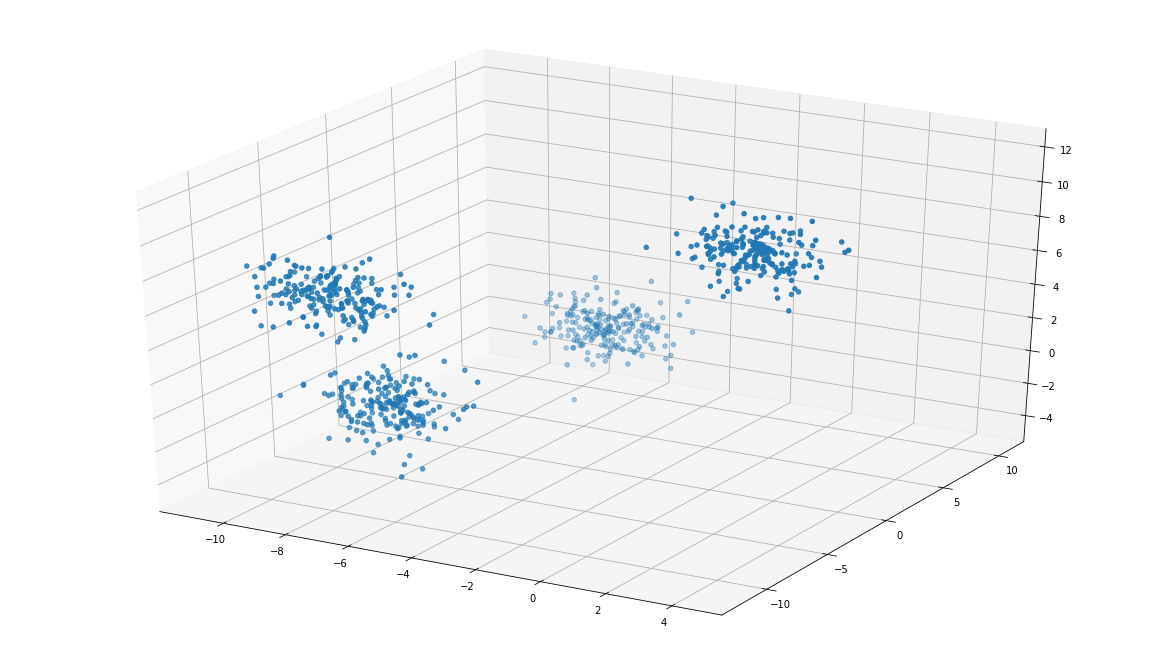

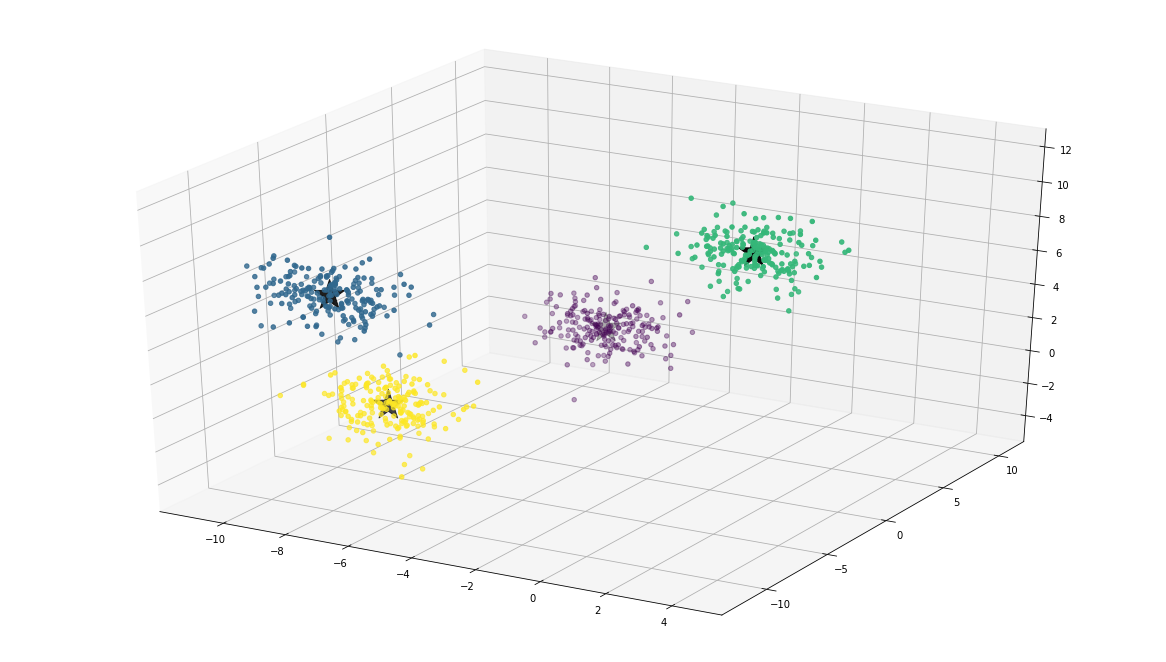

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

####################################################################################################################################

# Instanciamos KMeans
kmeans = KMeans(n_clusters=4)
# Treinamos os inputs
kmeans = kmeans.fit(X)
# Prevemos os cluters
labels = kmeans.predict(X)
# Obtemos os centróides
C = kmeans.cluster_centers_

# Plotamos
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

## Elbow Method
Desafio do algoritmo está em descobrir o número correto de K. O método mais famoso é o "método do cotovelo".

![alt text](https://cdn-images-1.medium.com/max/1600/0*k27usELCoFFnztEr)


1.   Calcule a soma dos erros quadrados para alguns valores de K
2.   A soma dos quadrados dos erros é definido como o quadrado das distâncias entre cada membro e o seu centróide
3. Ao plotar K vs SOMA DOS ERROS QUADRADOS verá que o erro diminui à medida em que K aumenta, quando a SOMA DOS ERROS QUADRADOS cair abruptamente, gerando um "cotovelo", aquele será seu número K.


https://www.scikit-yb.org/en/latest/api/cluster/elbow.html



/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fae3ad001d0>,
                 k=None, metric=None, model=None, timings=True)

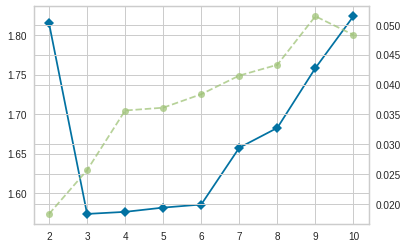

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

model = KElbowVisualizer(KMeans(X), k=10)
model.fit(X)

## PROJETO IRIS COM KMEANS

In [ ]:
#LIBS
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
# DATASET
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

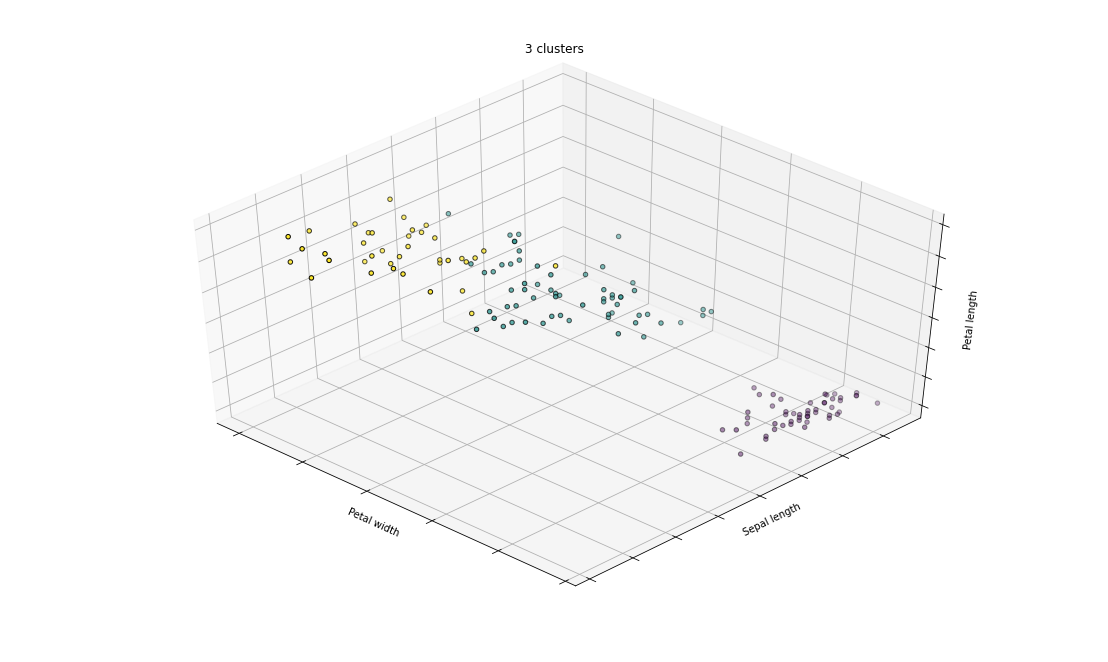

In [ ]:
# TREINAMENTO + DATAVIZ
estimators = [('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = ['3 clusters']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(16, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12

    fignum = fignum + 1